### Name : Prajapati.Dhruvi

### Project-3

In [78]:
import requests
from yelpapi import YelpAPI
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

### An api key from yelp 

In [80]:
api_key = "9F_s1ES7zWFSsWT8SlhxAhOVK-Tk_5jGtGgyiJhnct4cDXrGdjAMkMdmmeYTqRdVTEJXbWTPCdAh1fas6JAkQrYLhZ9rWbsVXlhIePicia5XV1UOcb3BryAjn986ZHYx"

### The 60 review of the resturant in San Franciso

In [ ]:
# Define the headers
headers = {
    'Authorization': f'Bearer {api_key}',
}

# Yelp API endpoint for business search
url = 'https://api.yelp.com/v3/businesses/search'

# Search parameters (searching for businesses in a specific category, location, etc.)
# default putting them as san Francisco
params = {
    'term': 'restaurant',  # or any category of interest
    'location': 'San Francisco',  # or any city of choice
    'limit': 20  # Retrieve 20 businesses
}

# Make the API request
response = requests.get(url, headers=headers, params=params)
businesses = response.json()['businesses']

# Extract reviews for each business (3 reviews per business)
reviews = []
for business in businesses:
    business_id = business['id']
    reviews_url = f'https://api.yelp.com/v3/businesses/{business_id}/reviews'
    reviews_response = requests.get(reviews_url, headers=headers)
    reviews_data = reviews_response.json().get('reviews', [])
    for review in reviews_data:
        reviews.append(review['text'])

# Let's inspect the first few reviews
reviews[:60]

In [66]:
# Download stopwords if needed
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Define the cleaning function
def clean_review(review_text):
    # Remove non-alphabetic characters
    review_text = re.sub(r'[^a-zA-Z\s]', '', review_text.lower())
    
    # Remove stopwords
    review_text = ' '.join([word for word in review_text.split() if word not in stop_words])
    
    return review_text

# Assuming 'reviews' is the list of reviews you want to clean
# Clean all reviews
cleaned_reviews = [clean_review(review) for review in reviews]

# Let's inspect the first 5 cleaned reviews
print(cleaned_reviews[:5])

['dont generally post reviews often honestly visiting place say something say place actually', 'dont usually write reviews place blew away warm welcome lively dining room everything perfect fresh focaccia', 'lauren server busy saturday night made dinner enjoyable checked us often quick refills water bread', 'times restaurant failed food amazing cocktails omg soo good server name david gave immediate', 'great food clam chowder best good atmosphere beautiful view superb service great waiter evening jorge awesome']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhruviprajapati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Cleaned 5 review 

#### Categorize reviews into positive, negative, and neutral 

In [49]:
def get_textblob_sentiment(review_text):
    # Create a TextBlob object
    blob = TextBlob(review_text)
    
    # Get the sentiment polarity (ranges from -1 (negative) to 1 (positive))
    return blob.sentiment.polarity

# Get TextBlob sentiment scores for each review
textblob_sentiments = [get_textblob_sentiment(review) for review in cleaned_reviews]

# Classify as positive, neutral, or negative
def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

textblob_sentiment_labels = [classify_sentiment(score) for score in textblob_sentiments]

# Check sentiment distribution
from collections import Counter
textblob_sentiment_distribution = Counter(textblob_sentiment_labels)
textblob_sentiment_distribution

Counter({'positive': 56, 'negative': 2, 'neutral': 2})

### Sentiment Analysis with TextBlob and NaiveBayesAnalyzer

In [51]:
# Initialize NaiveBayesAnalyzer
analyzer = NaiveBayesAnalyzer()

# Function to get the sentiment label using NaiveBayesAnalyzer
def get_nb_sentiment(review_text):
    # Analyze sentiment using NaiveBayesAnalyzer
    analysis = analyzer.analyze(review_text)
    return analysis.classification  # Access the 'classification' attribute, not 'classify'

# Get NaiveBayesAnalyzer sentiment labels for each cleaned review
nb_sentiment_labels = [get_nb_sentiment(review) for review in cleaned_reviews]

# Check sentiment distribution
nb_sentiment_distribution = Counter(nb_sentiment_labels)
print(nb_sentiment_distribution)

Counter({'pos': 46, 'neg': 14})


### Visualize Sentiment with a Donut Chart

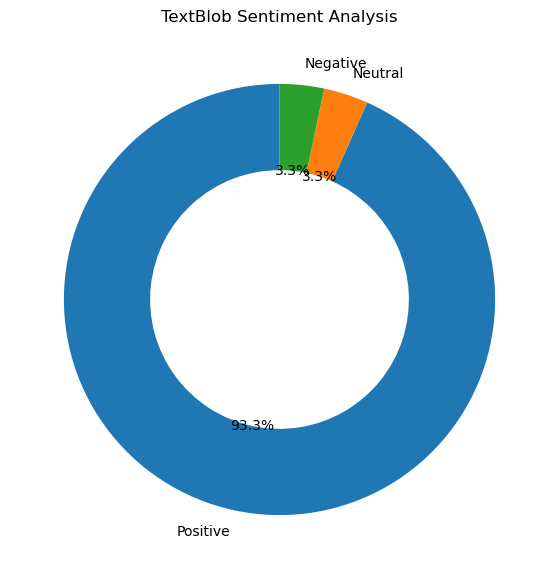

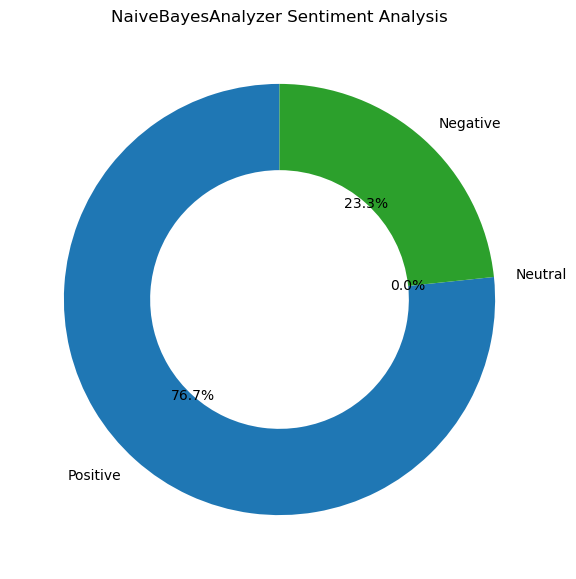

In [53]:
# Calculate sentiment percentages for TextBlob
textblob_percentages = [textblob_sentiment_distribution['positive'] / len(cleaned_reviews) * 100,
                        textblob_sentiment_distribution['neutral'] / len(cleaned_reviews) * 100,
                        textblob_sentiment_distribution['negative'] / len(cleaned_reviews) * 100]

# Calculate sentiment percentages for NaiveBayesAnalyzer
nb_percentages = [nb_sentiment_distribution['pos'] / len(cleaned_reviews) * 100,
                  nb_sentiment_distribution['neu'] / len(cleaned_reviews) * 100,
                  nb_sentiment_distribution['neg'] / len(cleaned_reviews) * 100]

# Create a function for the donut chart
def plot_donut_chart(labels, sizes, title):
    fig, ax = plt.subplots(figsize=(7, 7))
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
    ax.set_title(title)
    plt.show()

# Plot donut chart for TextBlob
plot_donut_chart(['Positive', 'Neutral', 'Negative'], textblob_percentages, 'TextBlob Sentiment Analysis')

# Plot donut chart for NaiveBayesAnalyzer
plot_donut_chart(['Positive', 'Neutral', 'Negative'], nb_percentages, 'NaiveBayesAnalyzer Sentiment Analysis')

#### WordCloud Visualization

##### This is coolest way to show review 

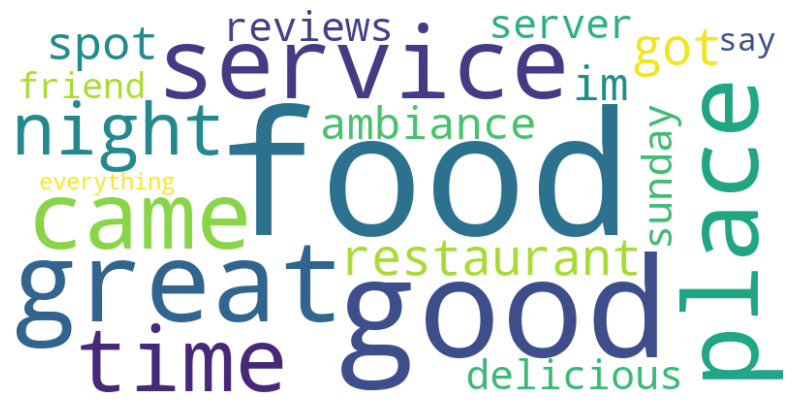

In [43]:
# Join all the cleaned reviews into a single string
all_reviews = ' '.join(cleaned_reviews)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=20, background_color='white').generate(all_reviews)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()